In [1]:
script = False

import numpy as np
import pandas as pd

from PIL import Image, ImageOps
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
def make_plot_all(objects, data):
    for i in range(len(objects)):
        #if(i==500): break
        if(i%4 == 0):
            plt.figure(figsize=(12,8))
            for j in range(4):
                if(i+j > len(objects)-1): break
                plt.subplot(1,4,j+1)
                print(data['COADD_OBJECT_ID'].iloc[i+j])
                plt.title(data['Prob'].iloc[i+j])
                rgb = make_lupton_rgb(objects[i+j][2], objects[i+j][1], objects[i+j][0], Q=11., stretch=40.)
                plt.imshow(rgb, aspect='equal')
                plt.xticks([], [])
                plt.yticks([], []) 
            if(script):
                plt.savefig(title+'_'+str(i+j), bbox_inches='tight')
                plt.close()
            else: 
                plt.show()

In [3]:
def explore(name, prob_lim):
    print(name)
    filename = name + '.fits'
    path = '/Users/jimenagonzalez/research/DSPL/Searching-double-lenses/vit_cnn/Y6_detections/'
    file_path = path + filename
    hdu_list = fits.open(file_path)
    images = hdu_list[1].data
    hdu_list.close()

    data = pd.read_csv(path + name + '_ids.csv')
    data.head()
    
    data = data[data['Prob'] > prob_lim]
    images = images[data.index.tolist()]
    print(len(data))
    make_plot_all(images, data)
    

DES0219-3706
6
1265129587
1265166515
1265140757
1265156273


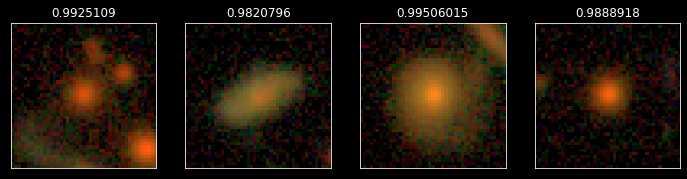

1265156004
1265113670


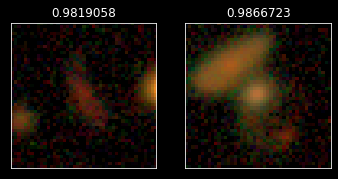

DES0326-1958
9
1385885638
1386423357
1385888519
1385881662


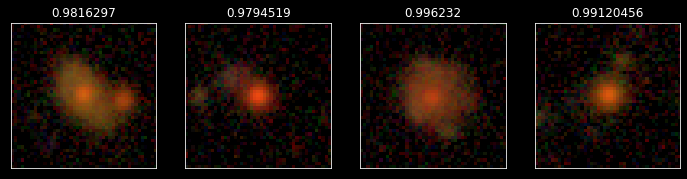

1385884465
1386428381
1385887946
1385880016


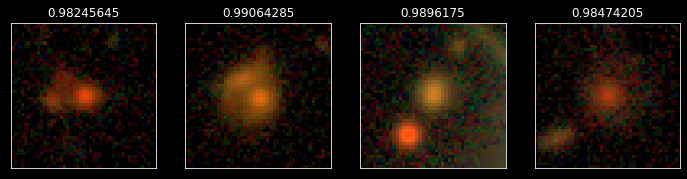

1386443850


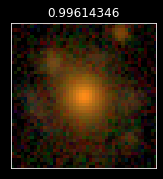

DES0456-2458
2
1518001144
1518000780


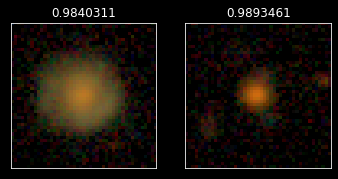

DES0457-3040
5
1518612949
1519161242
1519158202
1519169923


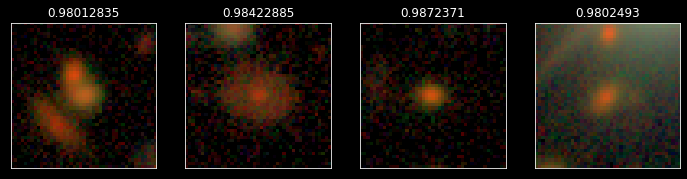

1519182144


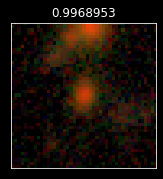

DES2108+0126
16
907362724
907335918
907359381
907362452


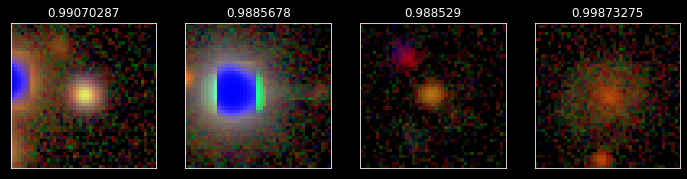

907375687
907336004
907346782
907335384


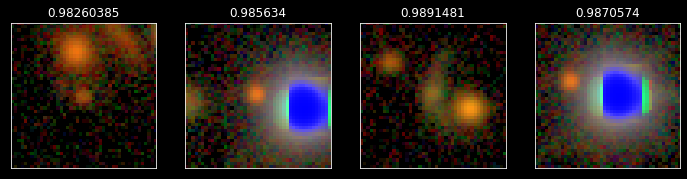

907366562
907377820
907367851
907365059


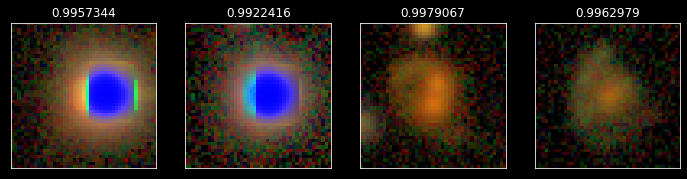

907375532
907386248
907346874
907386480


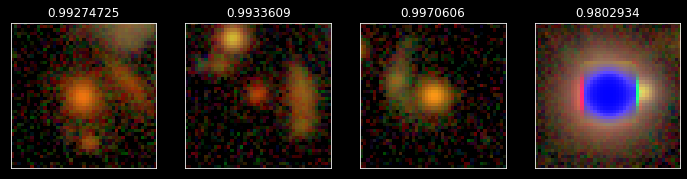

DES2359-6331
9
1032784294
1032781010
1032811706
1032790703


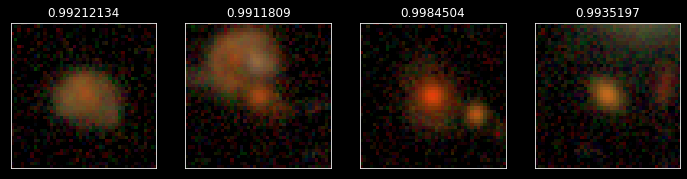

1032806361
1032780655
1032811109
1032957108


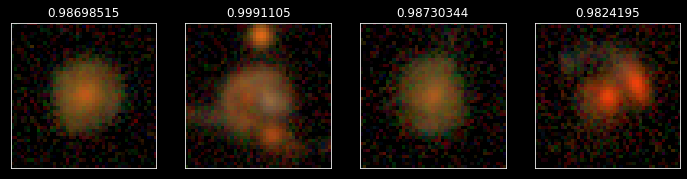

1032800932


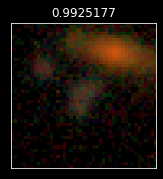

DES2359-6539
4
1031187873
1031207668
1031209612
1031199127


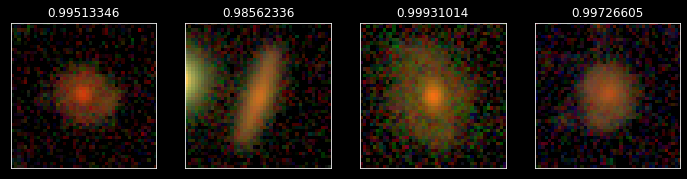

DES2359-0124
7
1033929081
1033923609
1033965806
1033957197


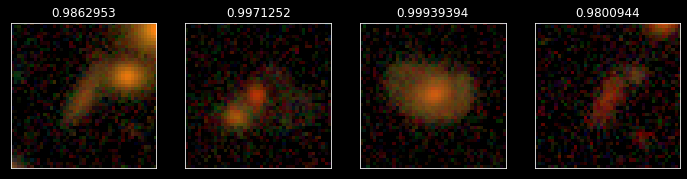

1033934569
1033950687
1033952961


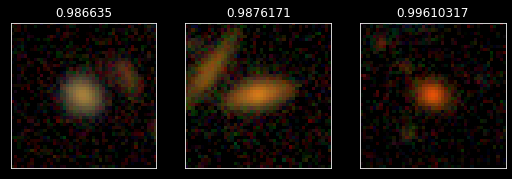

DES0118-1250
5
1156535926
1156497432
1156508319
1156525549


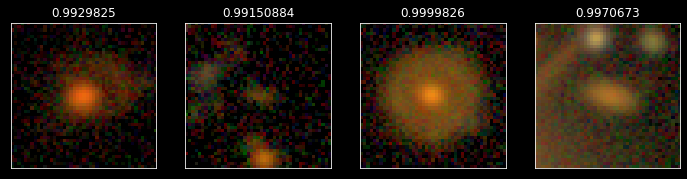

1156500864


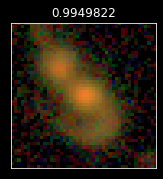

DES0219-2041
4
1264359909
1264185579
1264206100
1264210483


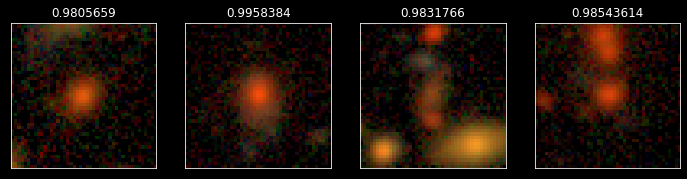

DES0325-3415
7
1449039234
1449339902
1449026879
1449035247


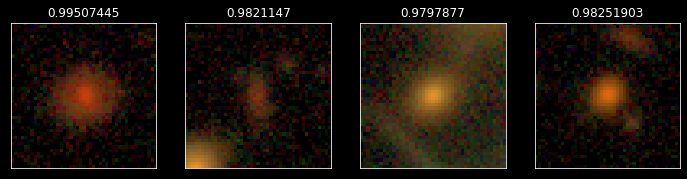

1449043751
1449338730
1449334934


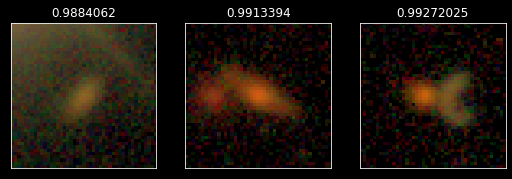

DES0456-2541
3
1518712715
1518703578
1518663848


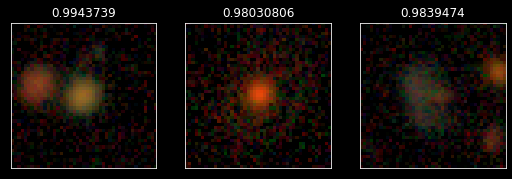

DES2106-6331
4
907138744
906985675
907145076
907155836


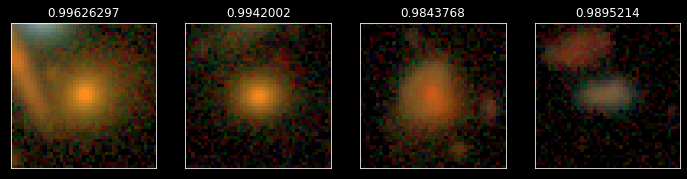

DES2359+0126
7
1033873277
1033880743
1033588621
1033915506


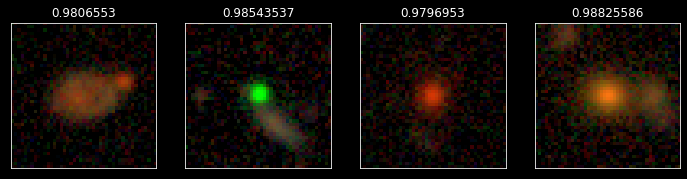

1033893599
1033912086
1033907195


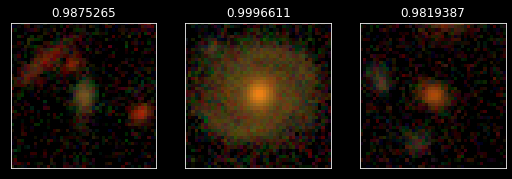

DES0118-1415
7
1158320483
1158269742
1158270222
1158277142


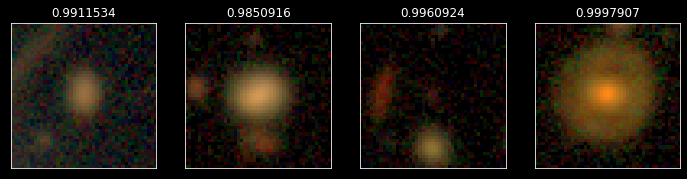

1158269903
1158321805
1158286879


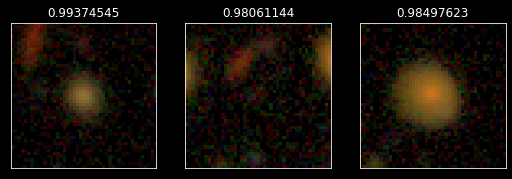

DES0219-2332
5
1263925807
1263900260
1263934259
1263900340


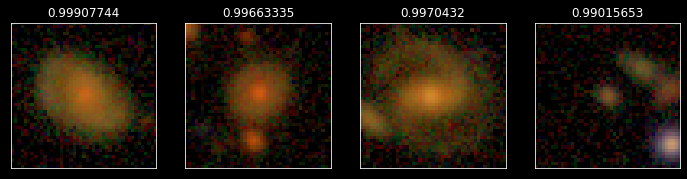

1264611783


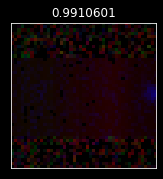

DES0325-3749
8
1620360106
1620380815
1620352994
1620338785


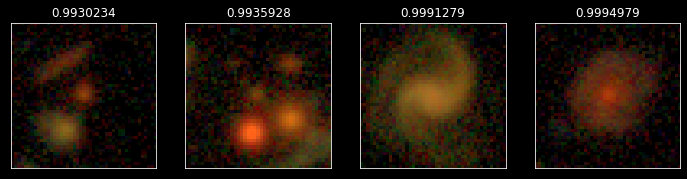

1620368015
1620333383
1620373194
1620398608


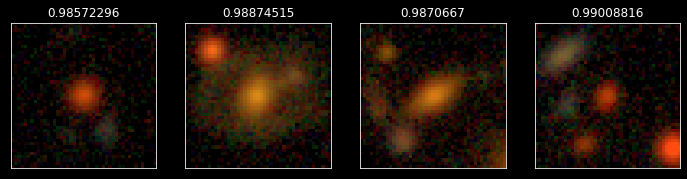

DES0456-2749
11
1517256583
1517284693
1517257979
1517283393


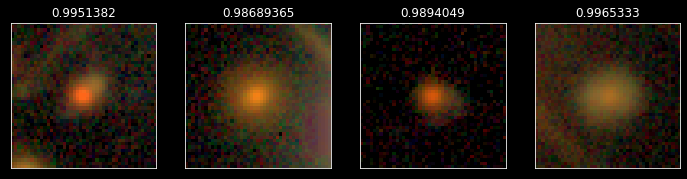

1517241828
1517297505
1517297523
1517270720


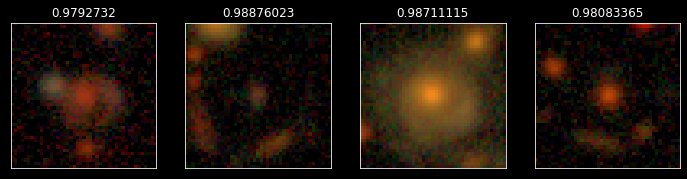

1517293919
1517275285
1517261006


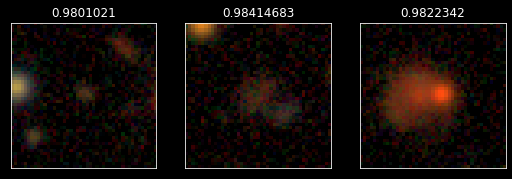

DES2107-3957
6
901443085
901438912
901459390
901433334


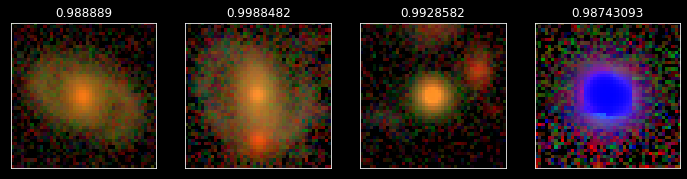

901447562
901473356


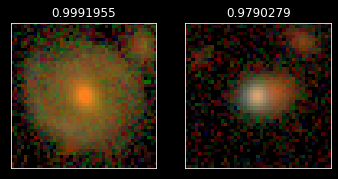

DES2359-0624
5
1031557511
1031533490
1031576346
1031536801


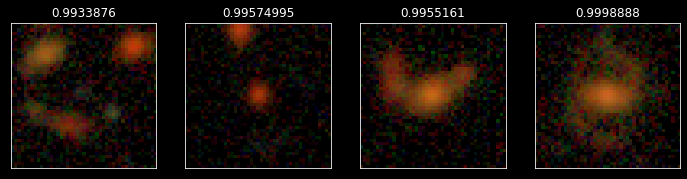

1031569579


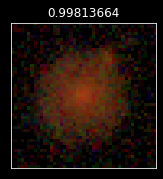

In [4]:
data = pd.read_csv('condor_files/tiles_pd.csv')
for index, row in data.iterrows():
    name = row['tile']
    prob_lim = 0.979
    explore(name, prob_lim)